## Lesson 2.1 Revision: Addressing Feedback for Clustering and PCA 
### Part 1 - Revision Steps:
#### Step 1: Importing Libraries & Data
#### Step 2: Reducing Dataset to 2010 and Scaling
#### Step 3: Storing Column Names in a Variable to Avoid Repetition
#### Step 4: Creating Dendrograms Using Variable
#### Step 5: Running PCA to Reduce Dimensions
#### Step 6: Creating Scatterplots to Compare Clusters and Labels
#### Step 7: Exporting Updated PCA DataFrame
#### Step 8: Notes

# Step 1: Importing Libraries & Data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [8]:
# Creating folder path to project folder
path = r'/Users/C SaiVishwanath/Desktop/ClimateWins'

# Importing datasets
df = pd.read_csv(os.path.join(path, '01 Data/Original Data/Pleasant_Weather.csv'))
df2 = pd.read_csv(os.path.join(path, '01 Data/Original Data/weather_prediction.csv'))

# Step 2: Reducing Dataset to 2010 and Scaling

In [11]:
df2010 = df2[df2['DATE'].astype(str).str.contains('2010')]
scaler = StandardScaler()
scaled_2010 = pd.DataFrame(scaler.fit_transform(df2010), columns=df2010.columns)

# Step 3: Storing Column Names in a Variable to Avoid Repetition

In [14]:
weather_columns = [
    'MADRID_cloud_cover', 'MADRID_wind_speed', 'MADRID_humidity', 'MADRID_pressure',
    'MADRID_global_radiation', 'MADRID_precipitation', 'MADRID_sunshine',
    'MADRID_temp_mean', 'MADRID_temp_min', 'MADRID_temp_max',
    'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure',
    'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine',
    'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max'
]

# Step 4: Creating Dendrograms Using Variable

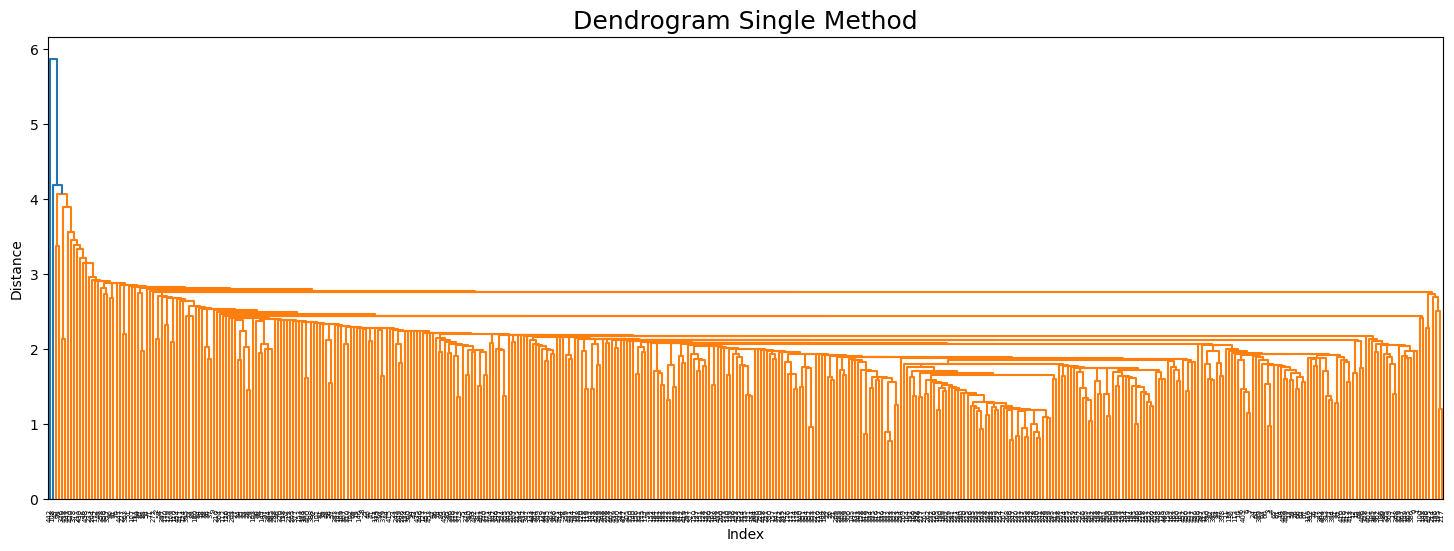

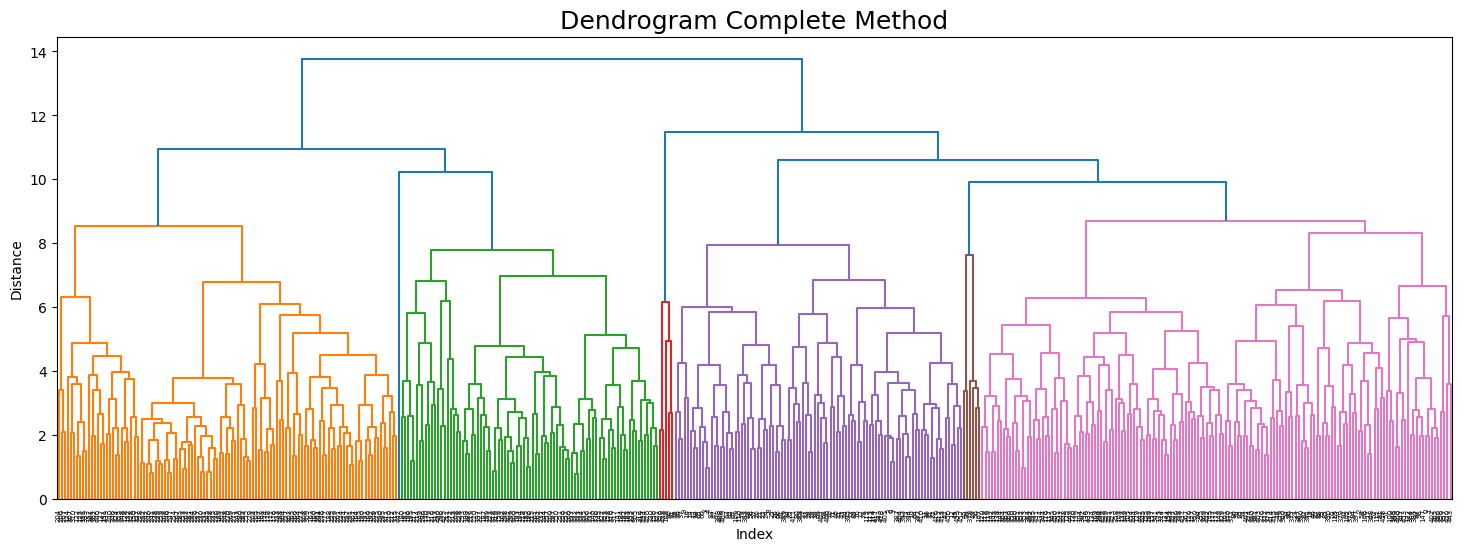

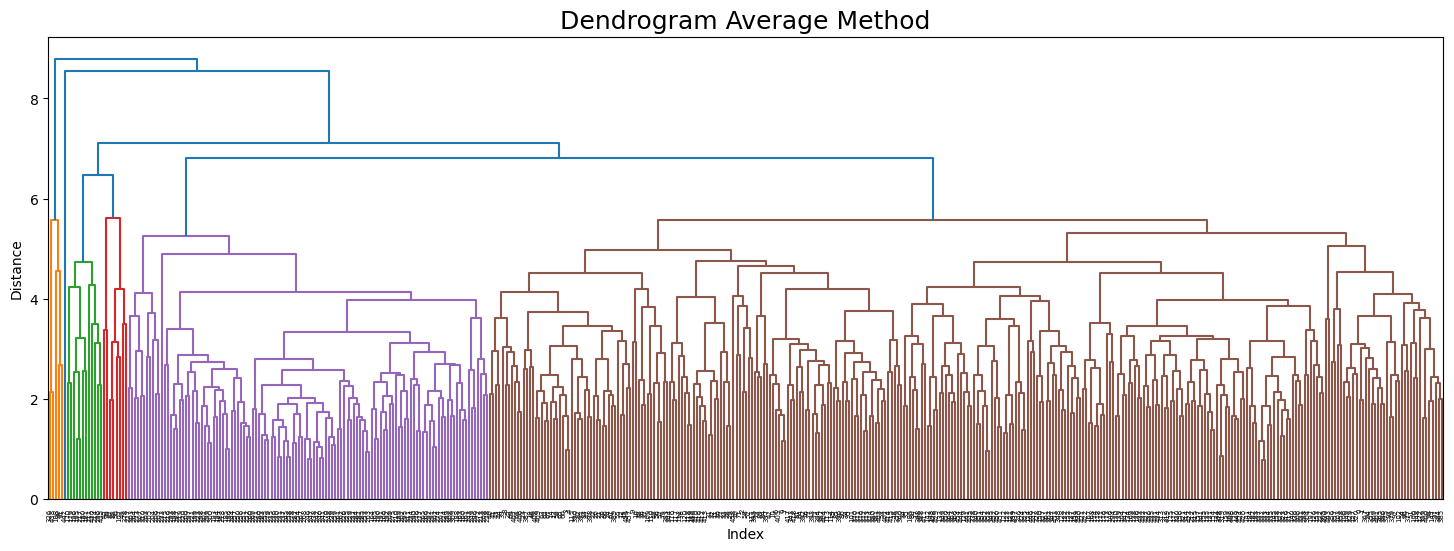

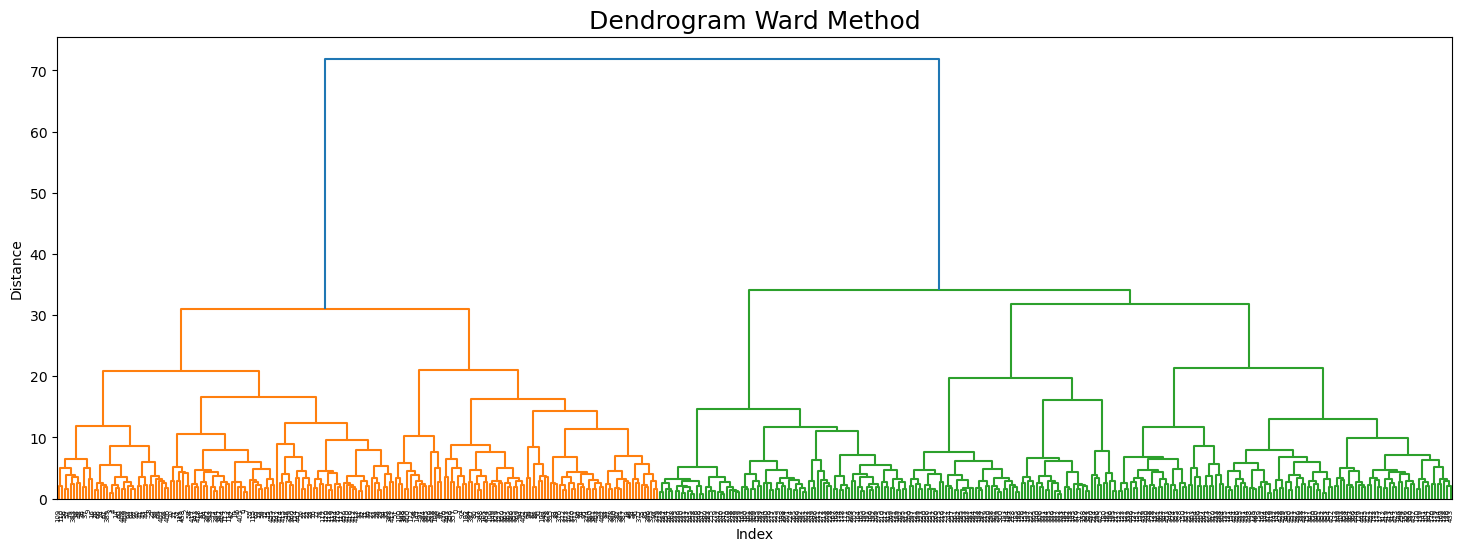

In [17]:
for method in ['single', 'complete', 'average', 'ward']:
    distance = linkage(scaled_2010.loc[:, weather_columns], method=method)
    plt.figure(figsize=(18, 6))
    dendrogram(distance, leaf_rotation=90)
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.title(f"Dendrogram {method.capitalize()} Method", fontsize=18)
    plt.show()

# Step 5: Running PCA to Reduce Dimensions

In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_2010[weather_columns])
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'])

In [28]:
# Aligning labels from df using DATE column
dfPCA['Labels'] = df.loc[df['DATE'].isin(df2010['DATE']), 'MADRID_pleasant_weather'].values
distance_ward = linkage(scaled_2010.loc[:, weather_columns], method='ward')
dfPCA['Clusters'] = fcluster(distance_ward, 2, criterion='maxclust')

# Step 6: Creating Scatterplots to Compare Clusters and Labels

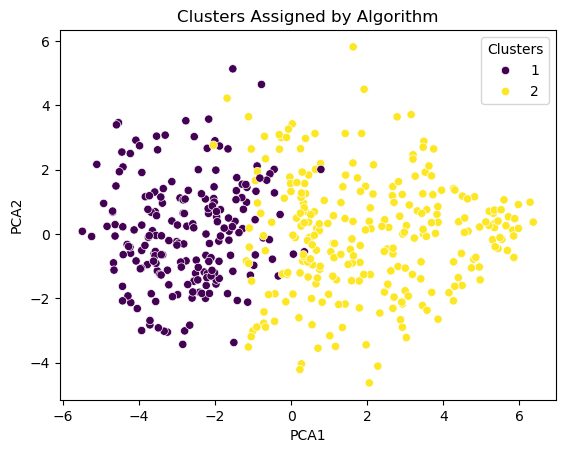

In [31]:
# Scatterplot 1: PCA1 vs PCA2 with Clusters
sns.scatterplot(data=dfPCA, x='PCA1', y='PCA2', hue='Clusters', palette='viridis')
plt.title('Clusters Assigned by Algorithm')
plt.show()

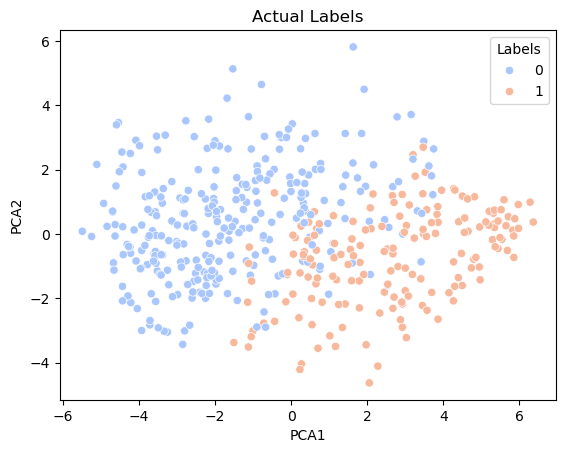

In [33]:
# Scatterplot 2: PCA1 vs PCA2 with Actual Labels
sns.scatterplot(data=dfPCA, x='PCA1', y='PCA2', hue='Labels', palette='coolwarm')
plt.title('Actual Labels')
plt.show()

# Step 7: Exporting Updated PCA DataFrame

In [36]:
dfPCA.to_csv(os.path.join(path, '01 Data/Prepared Data/2010_PCA_Updated.csv'), index=False)

# Step 8: Notes

### Evaluating how well the clustering algorithm performed by comparing clusters to actual labels:
- Scatterplot 1 (clusters assigned by algorithm) shows two distinct clusters with some overlap, indicating an effective separation 
- Scatterplot 2 (actual labels) also shows a separation into two groups, so algorithm's clusters align well with actual conditions
- The algorithm successfully grouped similar weather patterns, but there is some overlap and a few misclassifications
- Further refinement could improve accuracy
- Increasing number of clusters may improve results